In [3]:
from google.colab import files
uploaded = files.upload()

Saving IFC_Investment_Services_Projects__India.csv to IFC_Investment_Services_Projects__India.csv


In [4]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

#loading the data into data frame
df = pd.read_csv(io.BytesIO(uploaded['IFC_Investment_Services_Projects__India.csv']))

In [5]:
#displaying top 5 rows
df.head(5)

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Sector,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date
0,01/08/2021,RSE COVID Parag,Summary of Investment Information,43983,Loan,Parag Milk Foods Limited,India,IND,Agribusiness and Forestry,B,Regional Industry - MAS Asia & Pac,Pending,10/06/2020,NaN,NaN,41.19,NaN,41.19,IN,01/18/2021 09:37:00 PM
1,01/04/2021,Provident Housing,Summary of Investment Information,43201,Loan,PURAVANKARA LIMITED,India,IND,other,B,Regional Industry - MAS Asia & Pac,Active,11/09/2020,NaN,NaN,10.20,32.2,42.40,IN,01/18/2021 09:37:00 PM
2,12/21/2020,Stellaris Venture Partners India Trust II,Summary of Investment Information,44917,NaN,STELLARIS ADVISORS LLP,India,IND,Funds,FI-3,Disruptive Technologies and Funds,Pending,02/12/2021,NaN,NaN,NaN,NaN,NaN,IN,01/18/2021 09:37:00 PM
3,11/12/2020,NCML Silos,Summary of Investment Information,43587,Loan,NCML BASTI PRIVATE LIMITED,India,IND,Infrastructure,B,Regional Industry - INF Asia & Pac,Pending,12/14/2020,NaN,NaN,46.66,NaN,46.66,IN,01/18/2021 09:37:00 PM
4,10/22/2020,Netafim India,Summary of Investment Information,44420,NaN,NETAFIM IRRIGATION INDIA PRIVATE LIMITED,India,IND,Agribusiness and Forestry,B,Regional Industry - MAS Asia & Pac,Pending,11/20/2020,NaN,NaN,NaN,NaN,NaN,IN,01/18/2021 09:37:00 PM


In [6]:
#displaying bottom 5 rows
df.tail(5)

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Sector,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date
376,11/20/2000,Oriental Carbon and Chemicals Ltd.,Summary of Proposed Investment,10223,Loan,CONTINENTAL CARBON INDIA LIMITED,India,IND,other,B,"Gbl Ind, Manufact, Agribus &amp; Services",Completed,01/30/2001,NaN,NaN,9.0,NaN,9.00,IN,01/18/2021 09:37:00 PM
377,10/12/2000,Bharti Telecom,Summary of Proposed Investment,10379,Guarantee,BHARTI AIRTEL LIMITED,India,IND,other,B,Gbl Infrastructure & Natural Resources,Completed,11/15/2000,NaN,50.0,NaN,20.00,70.00,IN,01/18/2021 09:37:00 PM
378,09/21/2000,GEF PVMTI Shell Renewables,Summary of Proposed Investment,505600,NaN,UNKNOWN,India,IND,Infrastructure,C,Sustainable Business Advisory Dept,Completed,10/23/2000,NaN,NaN,NaN,NaN,NaN,IN,01/18/2021 09:37:00 PM
379,08/09/2000,Interlink Communications Ltd.,Summary of Proposed Investment,10312,Equity,"HEARTLAND INFORMATION SERVICES, INC",India,IND,other,C,"TMT, Venture Capital &amp; Funds",Completed,09/11/2000,NaN,NaN,NaN,2.00,2.00,IN,01/18/2021 09:37:00 PM
380,08/04/2000,"Eximbank West LB Factoring Co., Ltd.",Summary of Proposed Investment,10191,Loan,SBI GLOBAL FACTORS LIMITED,India,IND,other,C,"Global Industry, Financial Markets",Completed,09/19/2000,NaN,NaN,10.0,2.41,12.41,IN,01/18/2021 09:37:00 PM


Data Preprocessing

In [7]:
#checking data type
df.dtypes

Date Disclosed                                               object
Project Name                                                 object
Document Type                                                object
Project Number                                                int64
Product Line                                                 object
Company Name                                                 object
Country                                                      object
IFC Country Code                                             object
Sector                                                       object
Environmental Category                                       object
Department                                                   object
Status                                                       object
Projected Board Date                                         object
IFC investment for Risk Management(Million - USD)           float64
IFC investment for Guarantee(Million - USD)     

In [9]:

#dropping irrelevant columns
df1 =df.drop(['Date Disclosed','Product Line','Sector','Environmental Category','Department','Status','Project Name','Document Type','Project Number', 'Company Name','Country','IFC Country Code','Projected Board Date','WB Country Code','As of Date'],axis=1)
df1

,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
0,NaN,NaN,41.19,NaN,41.19
1,NaN,NaN,10.20,32.20,42.40
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,46.66,NaN,46.66
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
376,NaN,NaN,9.00,NaN,9.00
377,NaN,50.0,NaN,20.00,70.00
378,NaN,NaN,NaN,NaN,NaN
379,NaN,NaN,NaN,2.00,2.00


In [10]:
df1.shape

(381, 5)

In [11]:
# Rows containing duplicate data
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (134, 5)


In [12]:
# Used to count the number of rows before removing the data
df1.count() 

IFC investment for Risk Management(Million - USD)             4
IFC investment for Guarantee(Million - USD)                   3
IFC investment for Loan(Million - USD)                      242
IFC investment for Equity(Million - USD)                    196
Total IFC investment as approved by Board(Million - USD)    369
dtype: int64

In [13]:
# Dropping the duplicates 
df2 = df1.drop_duplicates()
df2.head(5)

,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
0,NaN,NaN,41.19,NaN,41.19
1,NaN,NaN,10.20,32.2,42.40
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,46.66,NaN,46.66
5,NaN,NaN,74.38,NaN,74.38


In [14]:
# Counting the number of rows after removing duplicates.
df2.count()


IFC investment for Risk Management(Million - USD)             4
IFC investment for Guarantee(Million - USD)                   3
IFC investment for Loan(Million - USD)                      166
IFC investment for Equity(Million - USD)                    145
Total IFC investment as approved by Board(Million - USD)    246
dtype: int64

In [15]:

# Finding the null values.
print(df2.isnull().sum())

IFC investment for Risk Management(Million - USD)           243
IFC investment for Guarantee(Million - USD)                 244
IFC investment for Loan(Million - USD)                       81
IFC investment for Equity(Million - USD)                    102
Total IFC investment as approved by Board(Million - USD)      1
dtype: int64


In [17]:
#Replacing all the NAN values in the columns with its mean valuea
df3 = df2.fillna(df2.mean())
df3

,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
0,21.625,39.583333,41.190000,19.723034,41.190000
1,21.625,39.583333,10.200000,32.200000,42.400000
2,21.625,39.583333,42.862229,19.723034,41.383049
3,21.625,39.583333,46.660000,19.723034,46.660000
5,21.625,39.583333,74.380000,19.723034,74.380000
...,...,...,...,...,...
373,21.625,39.583333,8.000000,2.000000,10.000000
374,21.625,39.583333,30.000000,0.000000,30.000000
376,21.625,39.583333,9.000000,19.723034,9.000000
377,21.625,50.000000,42.862229,20.000000,70.000000


,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
IFC investment for Risk Management(Million - USD),1.000000,0.000000,-0.006723,0.000000,-0.012343
IFC investment for Guarantee(Million - USD),0.000000,1.000000,-0.037008,0.000174,0.065814
IFC investment for Loan(Million - USD),-0.006723,-0.037008,1.000000,0.112732,0.844951
IFC investment for Equity(Million - USD),0.000000,0.000174,0.112732,1.000000,0.504501
Total IFC investment as approved by Board(Million - USD),-0.012343,0.065814,0.844951,0.504501,1.000000


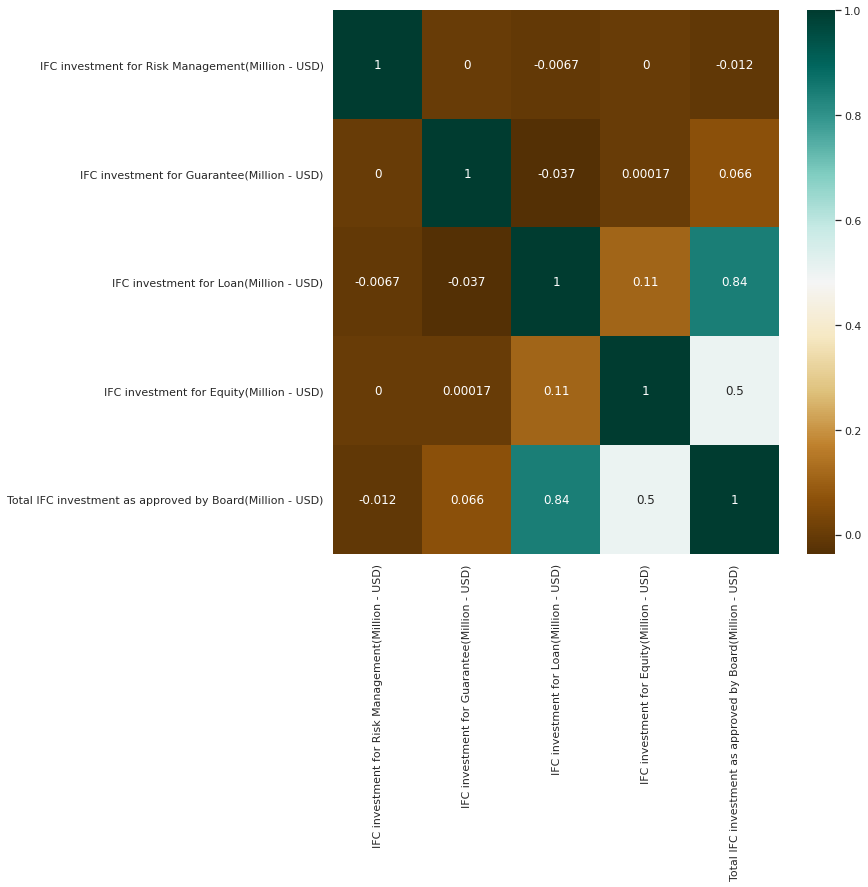

In [18]:
# Finding the relations between the variables.
plt.figure(figsize=(10,10))
c= df3.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


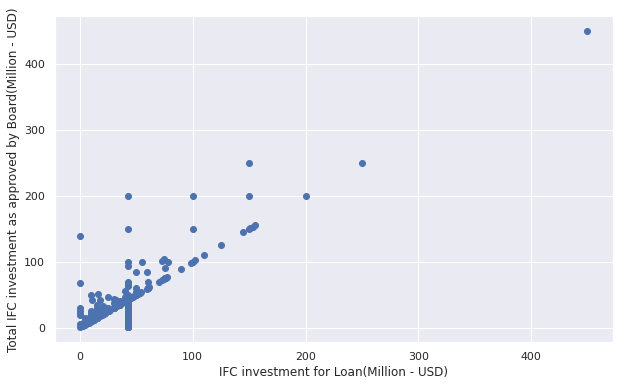

In [19]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df3['IFC investment for Loan(Million - USD)'], df3['Total IFC investment as approved by Board(Million - USD)'])
ax.set_xlabel('IFC investment for Loan(Million - USD)')
ax.set_ylabel('Total IFC investment as approved by Board(Million - USD)')
plt.show()

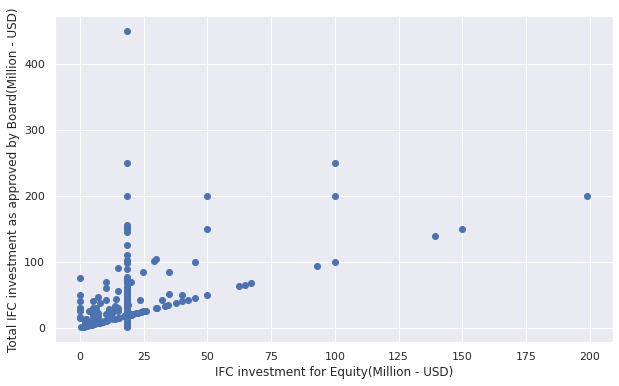

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df3['IFC investment for Equity(Million - USD)'], df3['Total IFC investment as approved by Board(Million - USD)'])
ax.set_xlabel('IFC investment for Equity(Million - USD)')
ax.set_ylabel('Total IFC investment as approved by Board(Million - USD)')
plt.show()

In [20]:
X = df3[['IFC investment for Risk Management(Million - USD)','IFC investment for Guarantee(Million - USD)','IFC investment for Loan(Million - USD)','IFC investment for Equity(Million - USD)']]
Y = df3['Total IFC investment as approved by Board(Million - USD)']

In [ ]:
X

,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD)
0,21.625,39.583333,41.190000,18.575714
1,21.625,39.583333,10.200000,32.200000
2,21.625,39.583333,45.779091,18.575714
3,21.625,39.583333,46.660000,18.575714
5,21.625,39.583333,74.380000,18.575714
...,...,...,...,...
373,21.625,39.583333,8.000000,2.000000
374,21.625,39.583333,30.000000,0.000000
376,21.625,39.583333,9.000000,18.575714
377,21.625,50.000000,45.779091,20.000000


In [ ]:
Y

0      41.190000
1      42.400000
2      40.446179
3      46.660000
5      74.380000
         ...    
373    10.000000
374    30.000000
376     9.000000
377    70.000000
380    12.410000
Name: Total IFC investment as approved by Board(Million - USD), Length: 247, dtype: float64

**Multiple Linear Regression**

In [21]:
from sklearn import linear_model
import statsmodels.api as sm

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept: 
 -76.20223655088688
Coefficients: 
 [-0.22289219  1.58154057  0.95905711  0.94789453]


In [22]:
# prediction with sklearn
New_IFC_investment_Risk_Management=21.625
New_IFC_investment_Guarantee=39.583333
New_IFC_investment_Loan = 46.660000	
New_IFC_investment_Equity = 18.575714
print ('Total IFC investment that will be  approved by Board(Million - USD', regr.predict([[New_IFC_investment_Risk_Management,New_IFC_investment_Guarantee,New_IFC_investment_Loan ,New_IFC_investment_Equity]]))

Total IFC investment that will be  approved by Board(Million - USD [43.93778879]


In [23]:
#displays a comprehensive table with statistical info generated by statsmodels.
'''This information can provide you additional insights about the model 
used (such as the fit of the model, standard errors, etc):

'''
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                               OLS Regression Results                                               
Dep. Variable:     Total IFC investment as approved by Board(Million - USD)   R-squared:                       0.893
Model:                                                                  OLS   Adj. R-squared:                  0.891
Method:                                                       Least Squares   F-statistic:                     503.5
Date:                                                      Tue, 20 Apr 2021   Prob (F-statistic):          5.37e-116
Time:                                                              13:11:34   Log-Likelihood:                -1043.5
No. Observations:                                                       247   AIC:                             2097.
Df Residuals:                                                           242   BIC:                             2114.
Df Model:                                                       